In [17]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR # for building SVR model
import scipy
import catboost as cb
from LocalRegression.bmlr import BMLR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import ray
import pickle
from pyearth import Earth
from sklearn.preprocessing import StandardScaler

In [18]:
dat = pd.read_csv('../data/Real_estate.csv')
dat.drop(['X4 number of convenience stores'], inplace=True, axis=1)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(dat.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dat.columns)

In [21]:
df_scaled

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,Y house price of unit area
0,-1.727872,-0.823683,1.255628,-0.792495,1.125430,0.448762,-0.005901
1,-1.719505,-0.823683,0.157086,-0.616612,0.912444,0.401139,0.310507
2,-1.711137,1.541151,-0.387791,-0.414015,1.486860,0.688183,0.685782
3,-1.702770,1.246435,-0.387791,-0.414015,1.486860,0.688183,1.237656
4,-1.694402,-1.121951,-1.117223,-0.549997,0.834188,0.592937,0.376732
...,...,...,...,...,...,...,...
409,1.694402,-0.528967,-0.352637,2.378365,-2.216993,-1.927835,-1.661525
410,1.702770,-1.711384,-1.064493,-0.788071,0.427579,0.635341,0.884457
411,1.711137,0.358734,0.095568,-0.549678,0.822893,0.423972,0.192774
412,1.719505,-0.528967,-0.844784,-0.776684,-0.184755,0.476814,1.068415


In [20]:
def model_bmlr_params(x, y, cut, M, include_y):
    epsilon_trial = (np.mean(np.std(x, axis=0)))/np.sqrt(x.shape[0])*3
    param_grid = {'epsilon': [epsilon_trial*x for x in [0.5, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0]]}
    bmlr = BMLR(cut=cut, M=M, substitution_policy='nearest', include_y=include_y)
    #gsh = GridSearchCV(bmlr, param_grid, cv=3, verbose=1).fit(x, y)
    #print(gsh.best_params_)
    #return gsh.best_params_
    sh = HalvingGridSearchCV(bmlr,  param_grid, cv=3, factor=3).fit(x, y)
    return sh.best_params_
    

def model_bmlr(x, y, x_test, y_test, cut, M, include_y, params):
    model = BMLR(cut=cut, M=M, substitution_policy='nearest', include_y=include_y, **params)
    model.fit(x, y)
    pred = model.predict(x_test)
    score = mean_squared_error(y_test, pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, pred)
    return score, mape, pred

In [31]:
X = df_scaled.drop(['Y house price of unit area'], axis=1)
X = X.to_numpy()
y = df_scaled['Y house price of unit area']
y = y.to_numpy()

In [44]:
model = BMLR(cut=10, M=1, substitution_policy='nearest', include_y=True)
model.fit(X, y)

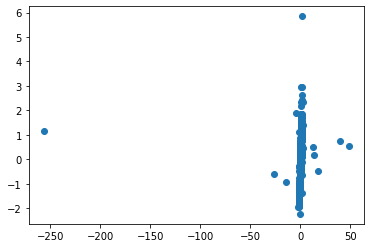

In [45]:
pred = model.predict(X)
plt.plot(pred, y, 'o')

In [60]:
[node for node in model.ball_mappers[0].Graph.nodes]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185